# ECE 466 Homework 2
---
__Spring 22__
__Due 2/10/2022__

* You have 10 extra points. I will carry your points over the other homeworks as well, so if you score 105 in this homework, I will add 0.5 points to your total homework score for the whole semester.
* You can collaborate on homeworks and turn in a homework for 2 people.
* Include your codes and answers within the cells that are requested. Do not create additional cells. 
* Double click on any cell to see the raw text that generates it. `shift+enter` runs a cell and shows you an output. Feel free to play with it but please return the question and description cells in the original format.
* You can find markdown tutorials and guides by simple google search. Cheatsheets should be more useful if you are short on time.
* Ask your questions in the [discussion forums in D2L](https://d2l.msu.edu/d2l/le/1382712/discussions/List). You can post in homework or coding related. If it's not specific to this homework $\rightarrow$ Coding Related.
* Office hours T-Th 4-5 pm.
* __Upload the .ipynb document and a generated .html in a zip:__  
* For html generation, you can google search. VSCode users: CTRL+SHIFT+P $\rightarrow$ type 'html' $\rightarrow$ Jupyter: Export to HTML

> I will import the necessary modules for you. Please only use these modules for now. 

**Your Name: [Name Surname]**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

#### 1:

![Figure of cascades of two systems](figure.jpg)

[12] Two discrete-time systems $T_1$ and $T_2$ are connected in cascade to form a new system $T$ as shown in the figure above. Prove or disprove the following statements. 

1. If $T_1$ and $T_2$ are linear, then $T$ is linear (i.e., the cascade connection of two linear systems is linear).
2. If $T_1$ and $T_2$ are causal, then $T$ is causal. 
3. If $T_1$ and $T_2$ are stable, then $T$ is stable. 
4. If $T_1$ and $T_2$ are linear and time invariant, then interchanging their order does not change the system $T$. 


<span style="color: red;"> Your answers for 1. should be written below in this cell. <span>

1. __True.__ We apply superposition principal. We are given that $T_1$ and $T_2$ are linear. 
Then, we need to show that $T(a_1x_1[n]+a_2x_2[n]) = a_1T_2(T_1(x_1[n]))+a_2T_2(T_1(x_2[n]))$.

    $T(a_1x_1[n]+a_2x_2[n]) = T_2(T_1(a_1x_1[n]+a_2x_2[n])) = T_2(a_1T_1(x_1[n])+a_2T_1(x_2[n])) = a_1T_2(T_1(x_1[n]))+a_2T_2(T_1(x_2[n]))$.

    where the second equality comes from the linearity of $T_1$ and the third equality comes from the linearity of the $T_2$.

2. __True.__ Let $T_1(x[n])=y'[n]$, and $T_2(y'[n]) = y[n]$. If $y'[n] = F_1(x[n], x[n-1],...)$, and $y[n] = F_2(y'[n], y'[n-1],...)$, where $F_1(.)$ and $F_2(.)$ are two functions, then, we have:
    
    $y[n] = F_2\big(F_1(x[n], x[n-1],...), F_1(x[n-1], x[n-2],...), F_1(x[n-2], x[n-3],...), ...\big) = F(x[n],x[n-1],...)$.

3. __True.__ Let $T_1(x[n])=y'[n]$, and $T_2(y'[n]) = y[n]$. If $|x[n]|\leq K$, by the stability of $T_1$, $|y'[n]|\leq M$. Similarly, if $|y'[n]|\leq M$, by the stability of $T_2$, $|y[n]|\leq L$. This ends the proof.

4. __True.__ Let the impulse response of $T_1$ be $h_1[n]$, and $T_2$, $h_2[n]$. If $T_1$ and $T_2$ are LTI, the impulse response of the cascade system $T$ is $h[n] = h_1[n]\ast h_2[n]$. By the commutativity principal of convolution, $h_1[n]\ast h_2[n] = h_2[n]\ast h_1[n]$. Hence, changing the order does not change the system response.

#### 2:

[10] The following input-output pairs have been observed during the operation of a linear system (_An underline below a number means that that number is the signal value at $n=0$, e.g._ $x_1[0]=2$.):

$$ x_1[n] = \{-1, \underline{2}, 1\} \xrightarrow{T} y_1[n] = \{1, \underline{2}, -1, 0, 1\}$$
$$ x_2[n] = \{1, \underline{-1}, -1\} \xrightarrow{T} y_2[n] = \{-1, \underline{1}, 0, 2\}$$
$$ x_3[n] = \{0, \underline{1}, 1\} \xrightarrow{T} y_3[n] = \{\underline{1}, 2, 1\}$$

Is this system time invariant or not?

<span style="color: red;"> Your answers for 2. should be written below in this cell. <span>

- By the linearity of the system, we first extract $x_1[n]+x_2[n] = \delta[n]$. (_Hence, the system's impulse response is $y_1[n]+y_2[n]$._) 
- Then, we can rewrite $x_3[n]$ as $x_3[n] = \delta[n]+\delta[n-1] = x_1[n]+x_2[n]+x_1[n-]+x_2[n-1]$. 
- If the system is time invariant, we expect $y_3[n] = y_1[n]+y_2[n]+y_1[n-]+y_2[n-1]$, which is not the case. 
- Hence, the system is not time invariant.

#### 3:

[15] Determine and plot the convolution $y[n]$ of signals:
$$ x[n] = 
        \begin{cases}
            \frac{n}{3}, 0\leq n \leq 6\\
            0, \text{otherwise}
        \end{cases}$$

$$ h[n] = 
        \begin{cases}
            1, -2\leq n \leq 2\\
            0, \text{otherwise}
        \end{cases}$$

Label your axes correctly (_Hint: Mind the $x$ axis._).

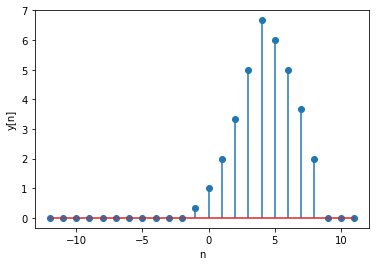

In [2]:
# Your code for 3 should be written and executed in this cell.
n = np.arange(-10,10)
x = np.zeros_like(n, dtype=float)
x[n[np.logical_and(n>=0, n<=6)]] = n[np.logical_and(n>=0, n<=6)]/3
h = np.ones(5)
y = np.convolve(x[n],h)

n = np.arange(-12,12) # New time indices as the output is stretched because of filtering. Check the definition of `np.convolve`
plt.stem(n, y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.show()

#### 4:
[30 points] Consider two banks. Bank \#1 offers a 6\% annual interest rate, but charges a \$1 service charge each year, including the year when the account was opened. Bank \#2 offers a 5\% annual interest rate, and has no annual service charge. Let $x_i[n]$ represent the amount of money you deposit in bank I during year $n$ and $y_i[n]$ represent your balance in bank $i$. Assume that deposits during year $n$ are credited to the balance in year n but earn no interest until year $n+1$. 

1. Use difference equations to express the relation between deposits and balances for each bank. 
2. Assume that you deposit $100 in each bank in the year 2022 and make no further deposits. Solve your difference equations in part a numerically to determine your balance in each bank during years 0 through 25. Make a plot of these balances. Which bank has the larger balance in the year 2026? Which bank has the larger balance in the year 2041?

<span style="color: red;"> Your answers for 4.1. should be written below in this cell. <span>

Bank 1: $y_1[n] = 1.06*y_1[n-1]+x[n]-1$

Bank 2: $y_2[n] = 1.05*y_2[n-1]+x[n]$

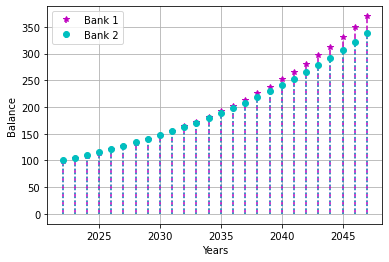

Bank 1 has $120.61, and Bank 2 has $121.55 balance by year 2026
Bank 1 has $265.77, and Bank 2 has $252.70 balance by year 2041


In [3]:
# Your code for 4.2 should be written and executed in this cell.
n = np.arange(0,26)
y_1 = np.zeros_like(n, dtype=float)
y_2 = np.zeros_like(n, dtype=float)
y_1[0] = 99
y_2[0] = 100
for i in range(25):
    y_1[i+1] = 1.06*y_1[i]-1
    y_2[i+1] = 1.05*y_2[i]

years = np.arange(2022, 2048)
plt.stem(years, y_1, markerfmt='m*', linefmt='m--', label='Bank 1', basefmt=' ')
plt.stem(years, y_2, markerfmt='co', linefmt='c:', label='Bank 2', basefmt=' ')
plt.xlabel('Years')
plt.ylabel('Balance')
plt.legend()
plt.grid()
plt.show()
print('Bank 1 has ${:.2f}, and Bank 2 has ${:.2f} balance by year {}'.format(y_1[4], y_2[4],years[4]))
print('Bank 1 has ${:.2f}, and Bank 2 has ${:.2f} balance by year {}'.format(y_1[19], y_2[19],years[19]))

#### 5:  
\[25 points\]
Consider a system represented by a linear constant coefficient difference equation given by $y[n] + \frac{1}{4}y[n-1] - \frac{1}{8}y[n-2] = x[n] + x[n-1]$, with initial conditions $y[-1]=4$, $y[-2]=-2$ and input signal $x[n]=(-1)^nu[n]$.

1. [10] Find the zero-input response and the zero-state responses. 
2. [6] Find the total response. Comment on the forced response. 
3. [6] What are the transient and steady-state responses in this case? 
4. [8] Find the impulse response of this system and comment on its stability. 

_You can solve the question by paper and pen and [embed an image](https://www.markdowntutorial.com/lesson/4/) in the markdown cell. Make sure that the image is legible in the output html._

<span style="color: red;"> Your answers for 5. should be written below in this cell. <span>

Check out the solution by hand below:

<img src="HW2_page_1.png" width="600" />

<img src="HW2_page_2.png" width="600" />

#### 6:
\[18\]
Determine the impulse responses of the systems described by the following difference equations and comment on their stability: 

1. $y[n] = 0.6 y[n-1] - 0.08 y[n-2] + x[n]$.
2. $y[n] + \frac{9}{16}y[n-2] = x[n-1]$. 
3. $y[n] - 0.7 y[n-1] + 0.1 y[n-2] = 2x[n] - x[n-2]$.

<span style="color: red;"> Your answers for question 6. should be written below in this cell. <span>

<img src="HW2_page_3.png" width="600" />

<img src="HW2_page_4.png" width="600" />